Importing Libaries

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [182]:
df=pd.read_csv(r"C:\Users\lenovo\Downloads\CarDataSet.csv")

In [183]:
df.columns

Index(['Unnamed: 0', 'Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'New_Price', 'Price'],
      dtype='object')

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [185]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,7253.000000,7253.000000,7.253000e+03,7200.000000,6019.000000
mean,2601.948435,2013.365366,5.869906e+04,5.279722,9.479468
std,1826.365869,3.254421,8.442772e+04,0.811660,11.187917
min,0.000000,1996.000000,1.710000e+02,0.000000,0.440000
25%,906.000000,2011.000000,3.400000e+04,5.000000,3.500000
50%,2392.000000,2014.000000,5.341600e+04,5.000000,5.640000
75%,4205.000000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [186]:
round(df.isnull().mean() * 100, 2)

Unnamed: 0            0.00
Name                  0.00
Location              0.00
Year                  0.00
Kilometers_Driven     0.00
Fuel_Type             0.00
Transmission          0.00
Owner_Type            0.00
Mileage               0.03
Engine                0.63
Power                 0.63
Seats                 0.73
New_Price            86.13
Price                17.01
dtype: float64

Data Cleaning

In [187]:
df.drop(['Unnamed: 0'],axis=1, inplace=True)

dropping the missing values of Mileage, Engine, Power, and Seats because they are less than 1% of the total data.

dropping the column of New_Price because the missing values from it are more than 86% of the total data.

In [188]:
df.dropna(subset=['Mileage','Engine','Power','Seats'],inplace=True)
df.drop(['New_Price'],axis=1, inplace=True)


In [189]:
# Use linear interpolation to impute missing values in 'Price'
df['Price'] = df['Price'].interpolate(method='linear', limit_direction='both')

In [190]:
df['Brand'] = df['Name'].apply(lambda row: row.split()[0])
df.drop(['Name'], axis=1, inplace=True)

In [191]:
df.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Brand                0
dtype: int64

Removing strings in data columns so we can perform analysis without type error

In [192]:
df['Mileage'] = df['Mileage'].str.replace('kmpl', '')
df['Mileage'] = df['Mileage'].str.replace('km/kg', '')
df['Engine'] = df['Engine'].str.replace('CC', '')
df['Power'] = df['Power'].str.replace('bhp', '')

Univariate Analysis

In [193]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74,Audi


<Axes: xlabel='Owner_Type', ylabel='count'>

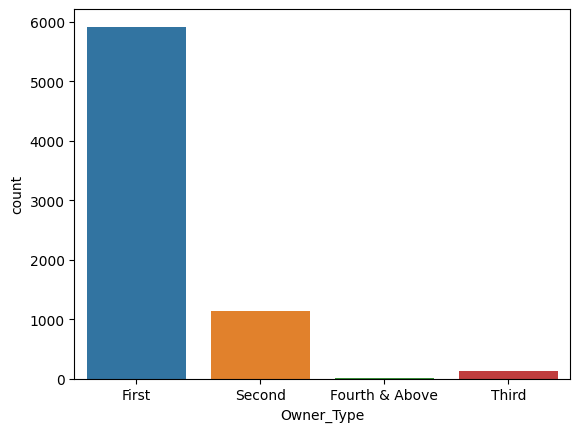

In [194]:
sns.countplot(x='Owner_Type',data=df)

<Axes: xlabel='Fuel_Type', ylabel='count'>

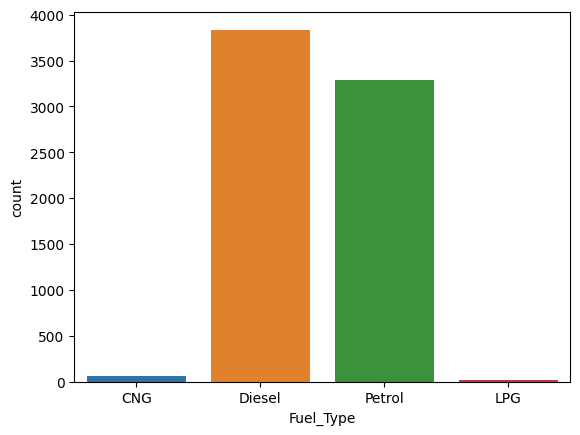

In [195]:
sns.countplot(x='Fuel_Type',data=df)

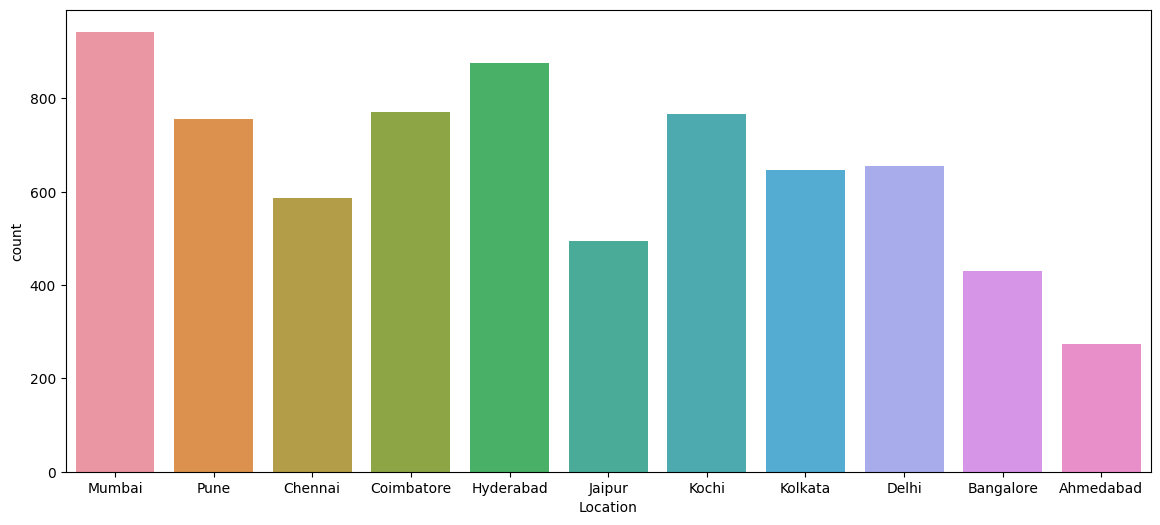

In [196]:
plt.figure(figsize = (14 ,6))
sns.countplot(data = df, x = 'Location')
plt.show()

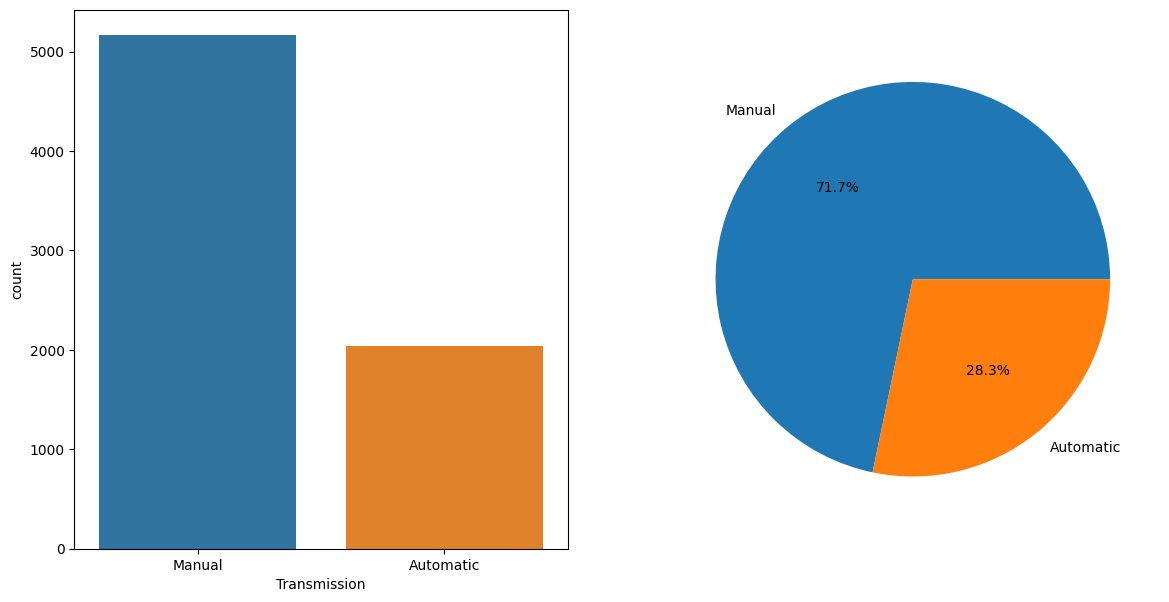

In [197]:
fig, ax = plt.subplots(1, 2, figsize = (14, 7))
sns.countplot(data = df, x = 'Transmission', ax = ax[0])
ax[1].pie(df['Transmission'].value_counts().values, labels = df['Transmission'].value_counts().index, 
          autopct = '%1.1f%%')
plt.show()

In [198]:
Brand_data = df['Brand'].value_counts().sort_values(ascending = False)

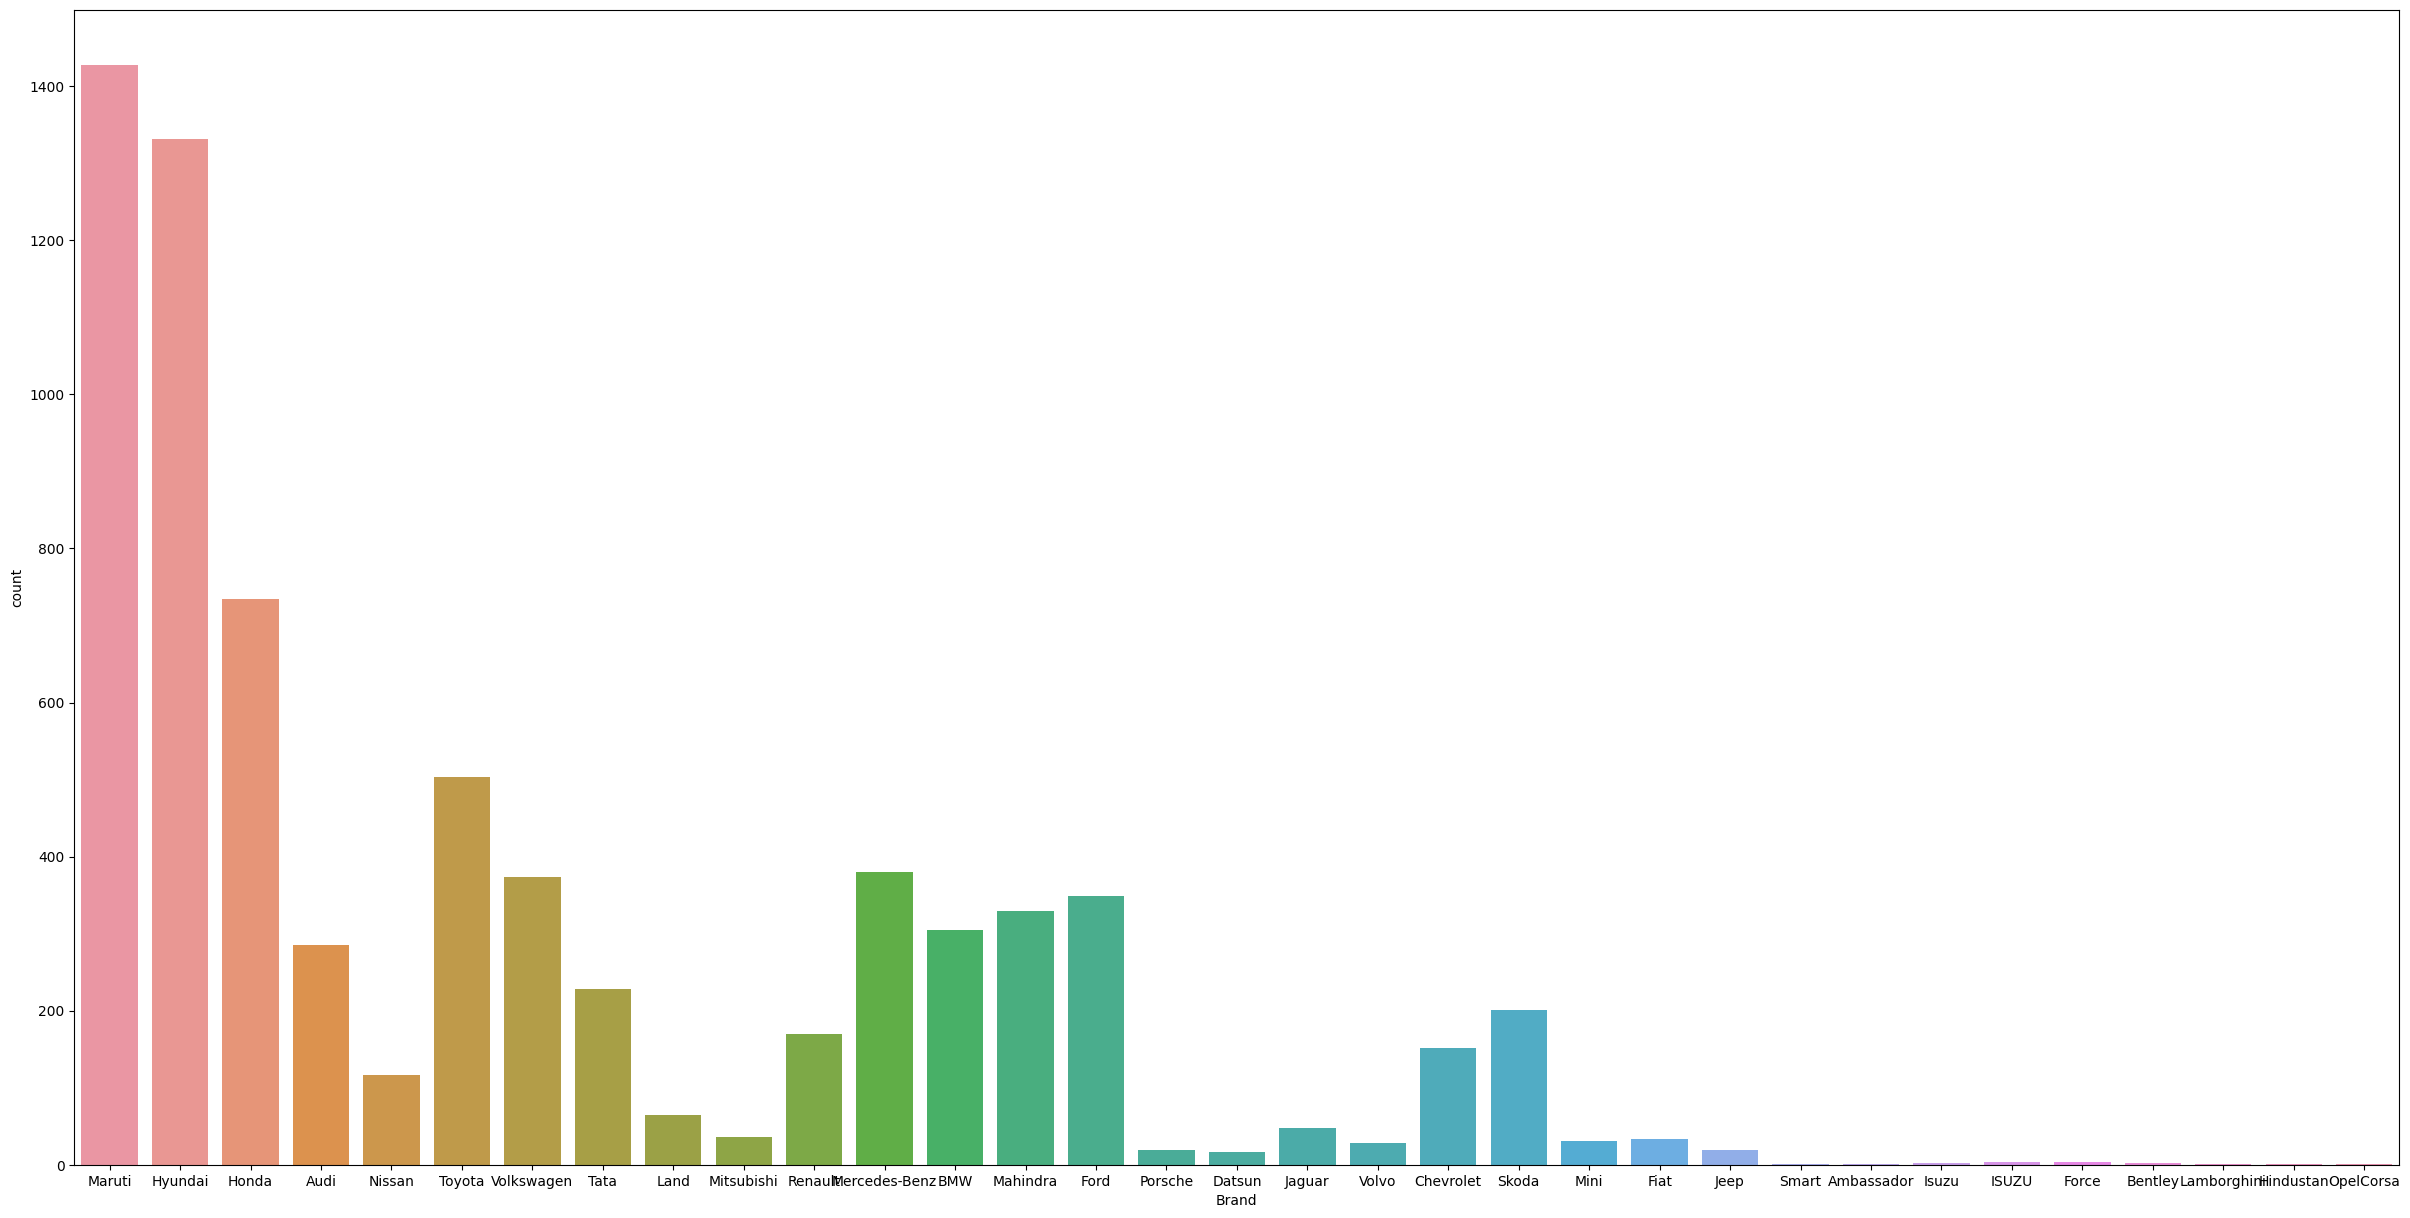

In [199]:
plt.figure(figsize = (30 ,15))
sns.countplot(data = df, x = 'Brand')
plt.show()

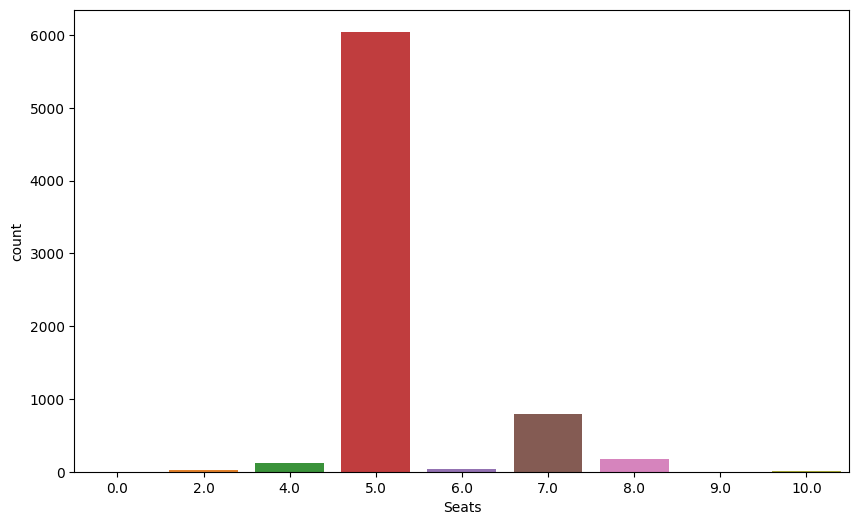

In [200]:
plt.figure(figsize = (10 ,6))
sns.countplot(data = df, x = 'Seats')
plt.show()

Bivariate Analysis

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17040\2424759649.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


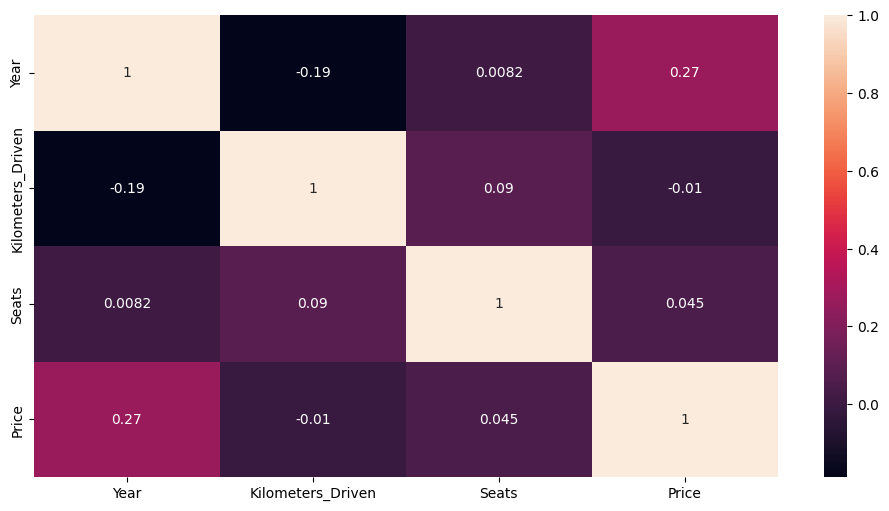

In [201]:
plt.figure(figsize = (12, 6))
sns.heatmap(df.corr(), annot = True)
plt.show()

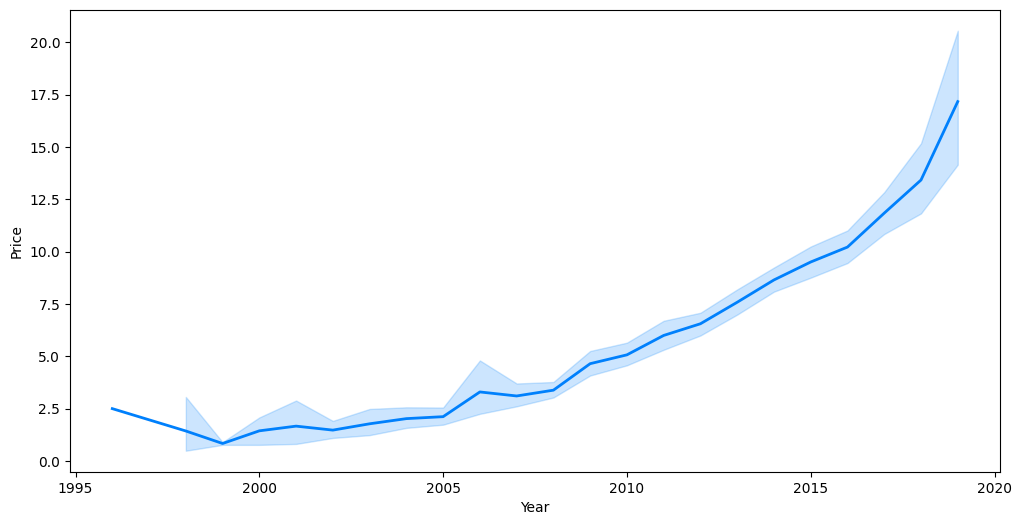

In [202]:
plt.figure(figsize = (12, 6))
sns.lineplot(data = df, x = 'Year', y = 'Price', linewidth = 2, color = '#0080fc')
plt.show()

There is a positive relationship between the price of the car and the year of the car, as the price of the car increases every year.

FUEL TYPE & PRICE

In [203]:
data_fuel_price = df.groupby('Fuel_Type')['Price'].median().sort_values(ascending = False)

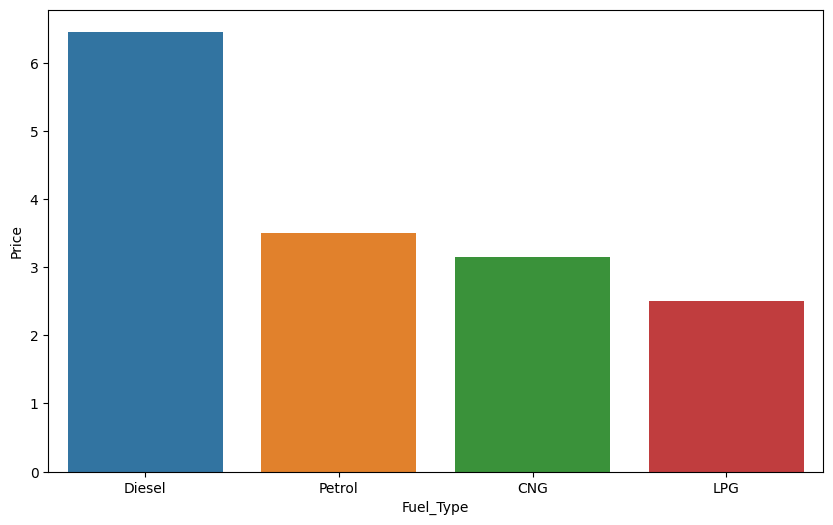

In [204]:
plt.figure(figsize = (10, 6))
ax = sns.barplot(x = data_fuel_price.index, y = data_fuel_price.values)
ax.set_ylabel("Price")
plt.show()

The cars that use fuel-type diesel have higher prices.

OWNER TYPE & PRICE

In [205]:
data_owner_price = df.groupby('Owner_Type')['Price'].median().sort_values(ascending = False)

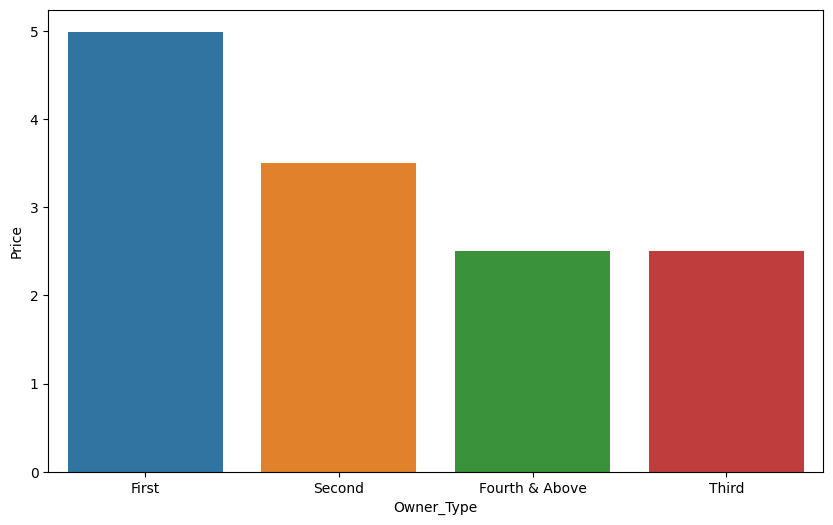

In [206]:
plt.figure(figsize = (10, 6))
ax = sns.barplot(x = data_owner_price.index, y = data_owner_price.values)
ax.set_ylabel("Price")
plt.show()

The cars that had only one owner have a higher price than the cars that had multiple owners.

Modeling

In [207]:
X = df[['Mileage','Year','Kilometers_Driven','Seats']].values # Dependent variables
y = df['Price'].values.reshape(-1,1) # independent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [208]:
reg=LinearRegression()

In [209]:
reg.fit(X_train,y_train)

LinearRegression()

In [210]:
reg.coef_

array([[-1.03031281e+00,  1.37259341e+00,  5.85141454e-06,
        -1.27132667e+00]])

In [211]:
reg.intercept_

array([-2730.0977797])

In [212]:
Y_pred=reg.predict(X_test)

In [213]:
mae=mean_absolute_error(y_test,Y_pred)
mse=mean_squared_error(y_test,Y_pred)
r2=np.sqrt(mse)

In [214]:
print('Mean absolute error for model is : ',mae)
print('R2 of model is : ',r2)

Mean absolute error for model is :  5.084645134940478
R2 of model is :  8.574653057579459


In [215]:
df_pred=pd.DataFrame({'Actual':y_test.squeeze(),'Predicted':Y_pred.squeeze()})
df_pred

,Actual,Predicted
0,5.50,9.681800
1,29.60,17.574481
2,5.10,4.794675
3,7.65,10.758575
4,22.00,11.463259
...,...,...
715,27.50,14.952548
716,4.75,10.307995
717,3.75,4.420928
718,19.00,13.211602
